In [1]:
# import important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys
sys.path.insert(0,'../scripts/')
import plots

In [2]:
# load the data
df = pd.read_csv('../data/AdSmartABdata.csv')

In [3]:
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


# Exploring the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [33]:
df.columns.tolist()

['auction_id',
 'experiment',
 'date',
 'hour',
 'device_make',
 'platform_os',
 'browser',
 'yes',
 'no']

# Check for missing values

In [5]:
# checking for missing values
df.isna().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

## Drop duplicates if they exist

In [6]:
df.drop_duplicates()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


In [7]:
df[df.duplicated()]


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no


In [8]:
df.shape

(8077, 9)

#### The data is clean. No further preprocessing needed!!!


### checking for correlation

In [9]:
df.corr()

,hour,platform_os,yes,no
hour,1.000000,0.000062,0.013481,-0.021725
platform_os,0.000062,1.000000,0.054305,0.046941
yes,0.013481,0.054305,1.000000,-0.083098
no,-0.021725,0.046941,-0.083098,1.000000


### Counting the 'yes' and 'no' in both experiment group

In [10]:
#control_df = df[df['experiment'] == 'control']
experiment_vals = df.groupby('experiment').agg({'yes':'sum','no':'sum'})
experiment_vals

,yes,no
experiment,,
control,264,322
exposed,308,349


<AxesSubplot:xlabel='experiment'>

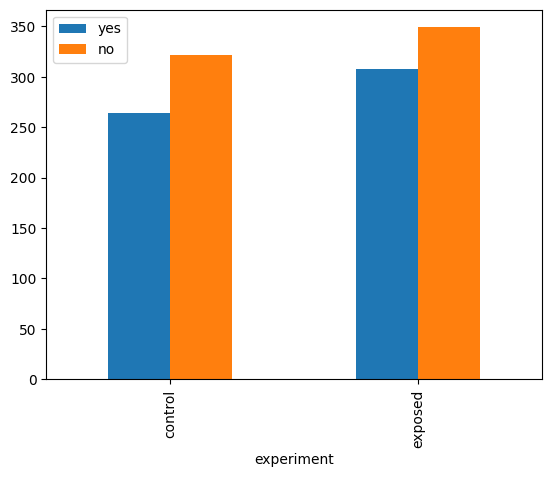

In [13]:
# plotting the result
experiment_vals.plot(kind='bar')

In [16]:
# basic discription of experimet_vals
experiment_vals.describe()

,yes,no
count,2.000000,2.000000
mean,286.000000,335.500000
std,31.112698,19.091883
min,264.000000,322.000000
25%,275.000000,328.750000
50%,286.000000,335.500000
75%,297.000000,342.250000
max,308.000000,349.000000


### Getting the control and exposode groups

In [34]:
# copying dataframe to explore the control and exposed groups more
new_df = df.copy(deep=True)


#### Users who selected 'yes' or 'no'

In [40]:

new_df = new_df[new_df['yes'] == 1].append(new_df[new_df['no'] == 1])
new_df.head(5)

/tmp/ipykernel_1261094/3693897919.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df[new_df['yes'] == 1].append(new_df[new_df['no'] == 1])


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
45,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,0
65,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1,0
89,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1,0


In [41]:
new_df.shape

(1243, 9)

#### Get the number of the control group

In [48]:
control_df = new_df[new_df['experiment'] == 'control']
control_df.shape # Those are the number of people in the control group i.e 586

(586, 9)

#### Get the number of people in the exposed group

In [47]:
exposed_df = new_df[new_df['experiment'] == 'exposed']
exposed_df.shape

(657, 9)

#### Dropping the columns with both 'yes' = 0 and 'no' = 0

In [52]:
# for control group
df1 = control_df[control_df['yes'] == 1].drop(['yes','no'], axis = 1)
df1['response'] = 1
df2 = control_df[control_df['no'] == 1].drop(['yes','no'], axis = 1)
df2['response'] = 0
control_clean_df = df1.append(df2).reset_index(drop=True)
control_clean_df.head(5)

/tmp/ipykernel_1261094/2409593481.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  control_clean_df = df1.append(df2).reset_index(drop=True)


,auction_id,experiment,date,hour,device_make,platform_os,browser,response
0,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1
1,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1
2,0332a7f7-0336-4d48-96ad-75da00d916c0,control,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1
3,03948b84-b5b1-4f26-81fc-e953218aef1a,control,2020-07-09,20,Samsung SM-G930F,6,Facebook,1
4,04b69bd8-4849-4489-adcf-08b96a265c40,control,2020-07-07,15,Generic Smartphone,6,Chrome Mobile,1


In [53]:
control_clean_df.to_csv('../data/control_group_data.csv')

In [54]:
# for the exposed group
df1 = exposed_df[exposed_df['yes'] == 1].drop(['yes','no'], axis = 1)
df1['response'] = 1
df2 = exposed_df[exposed_df['no'] == 1].drop(['yes','no'], axis = 1)
df2['response'] = 0
exposed_clean_df = df1.append(df2).reset_index(drop=True)
exposed_clean_df.head(5)

/tmp/ipykernel_1261094/3058264158.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  exposed_clean_df = df1.append(df2).reset_index(drop=True)


,auction_id,experiment,date,hour,device_make,platform_os,browser,response
0,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1
1,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1
2,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1
3,03ee1780-1fa3-4bec-926c-d543a81a6653,exposed,2020-07-04,11,Samsung SM-G981B,6,Chrome Mobile WebView,1
4,046644f4-b30c-48f9-b069-f804a97b77d9,exposed,2020-07-05,2,Generic Smartphone,6,Chrome Mobile WebView,1


In [ ]:
exposed_clean_df.to_csv('../data/exposed_clean_data.csv')

##### There are 586 peoples in control and 657 in exposed group 

### checking the 'yes' and 'no' based on the browser info

In [17]:
browser_vals = df.groupby('browser').agg({'yes':'sum','no':'sum'})
browser_vals.sort_values(by=['yes','no'], ascending=False)

,yes,no
browser,,
Chrome Mobile,314,381
Chrome Mobile WebView,116,111
Facebook,69,87
Samsung Internet,67,78
Mobile Safari,4,10
Chrome,1,1
Chrome Mobile iOS,1,0
Mobile Safari UI/WKWebView,0,3
Android,0,0


### Counting the 'yes' and 'no' based on the device_make info

In [18]:
device_vals = df.groupby('device_make').agg({'yes':'sum','no':'sum'})
device_vals.sort_values(by=['yes','no'], ascending=False)

,yes,no
device_make,,
Generic Smartphone,321,398
Samsung SM-G960F,21,24
Samsung SM-G950F,16,19
Samsung SM-G930F,11,5
Samsung SM-G973F,10,12
...,...,...
XiaoMi Redmi Note 8,0,0
XiaoMi Redmi Note 8 Pro,0,0
XiaoMi Redmi Note 8T,0,0


In [19]:
device_vals.describe()

,yes,no
count,270.000000,270.000000
mean,2.118519,2.485185
std,19.627404,24.296759
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,321.000000,398.000000


### Counts of 'yes' and 'no' by OS

In [20]:
os_vals = df.groupby('platform_os').agg({'yes':'sum','no':'sum'})
os_vals.sort_values(by=['yes','no'], ascending=False)

,yes,no
platform_os,,
6,567,659
5,5,12
7,0,0


In [21]:
os_vals.describe()

,yes,no
count,3.000000,3.000000
mean,190.666667,223.666667
std,325.923815,377.057467
min,0.000000,0.000000
25%,2.500000,6.000000
50%,5.000000,12.000000
75%,286.000000,335.500000
max,567.000000,659.000000


### Plotting the distribution of 'yes' column

<Figure size 900x700 with 0 Axes>

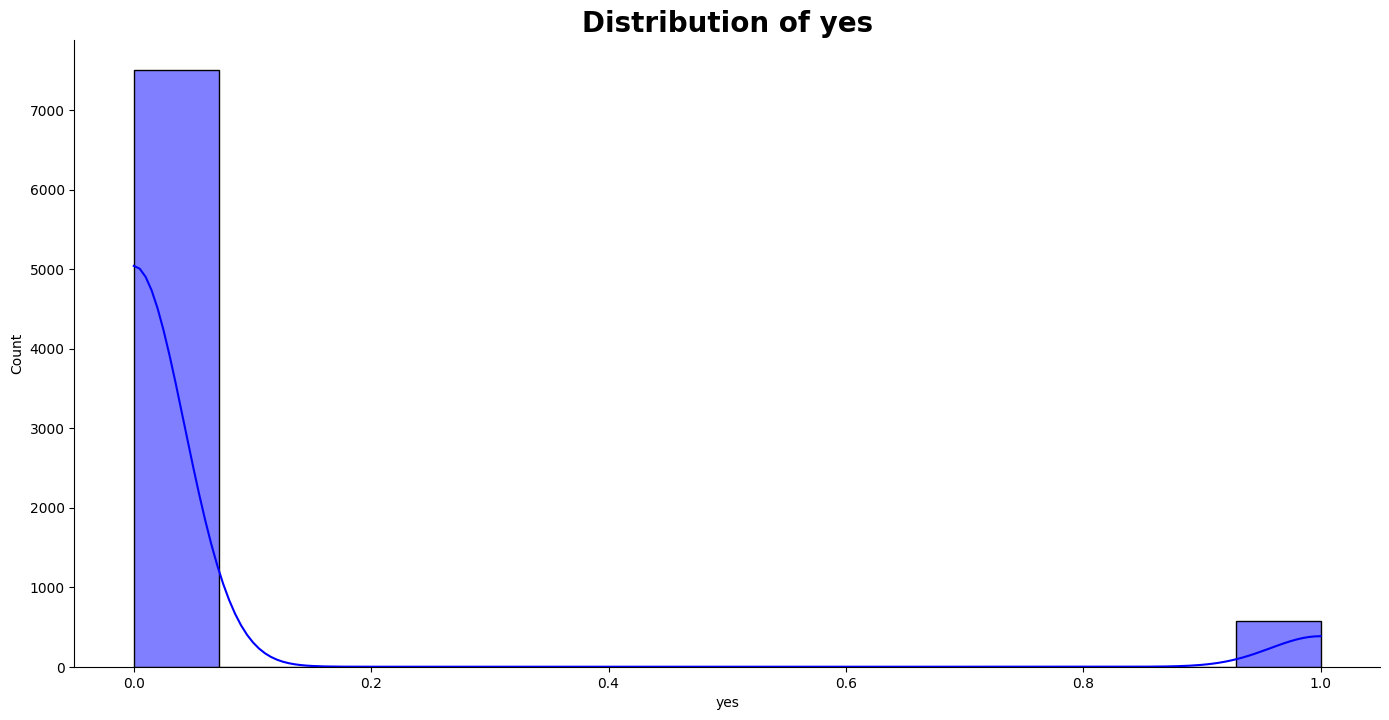

In [14]:
plots.plot_hist(df,'yes','blue')

### Plotting the distribution of 'no' column

<Figure size 900x700 with 0 Axes>

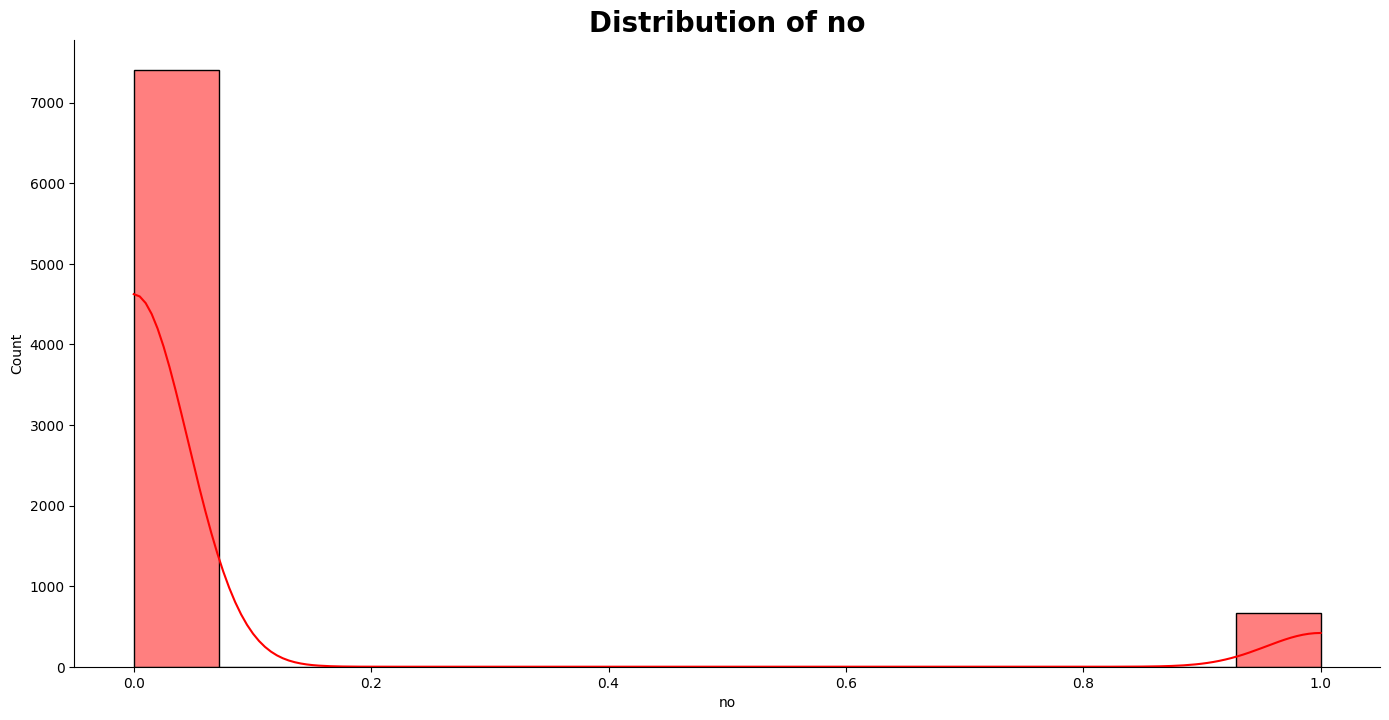

In [16]:
plots.plot_hist(df,'no','red')

In [32]:
#df.columns.tolist()

### plot the distribution of hour

<Figure size 900x700 with 0 Axes>

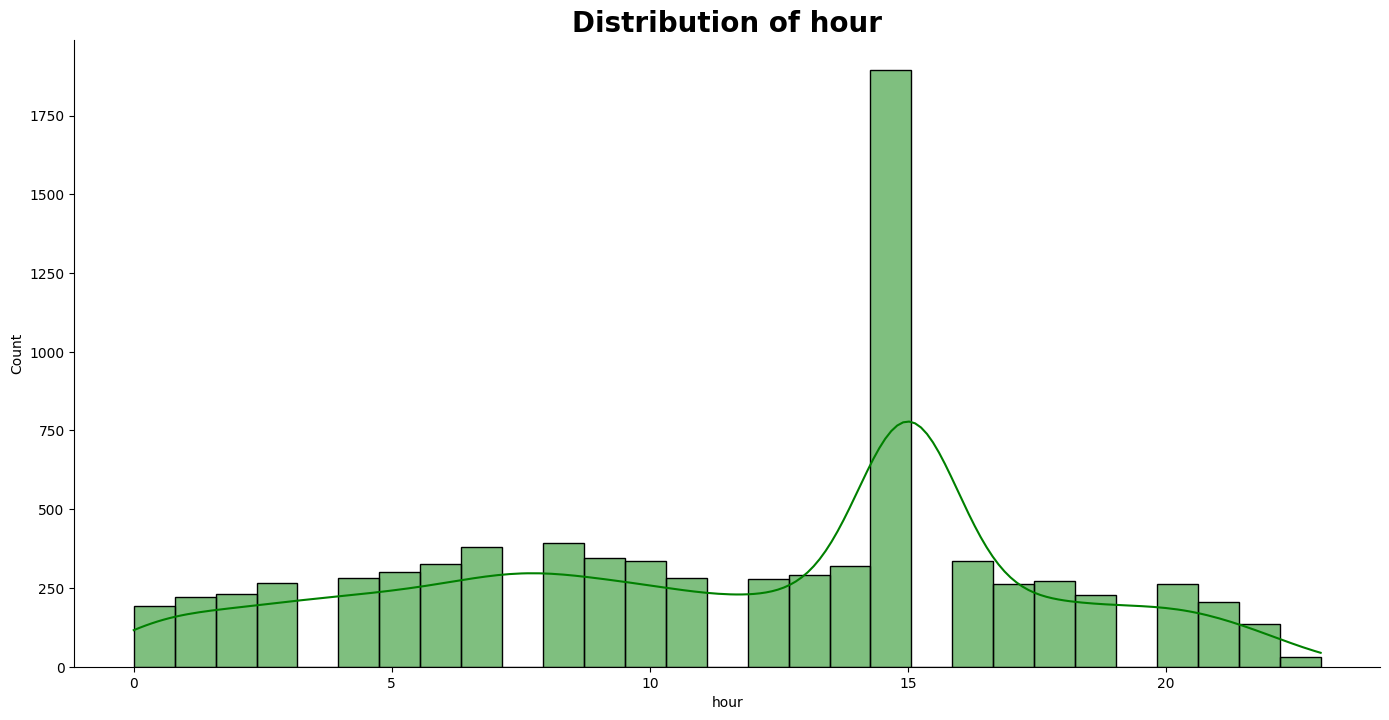

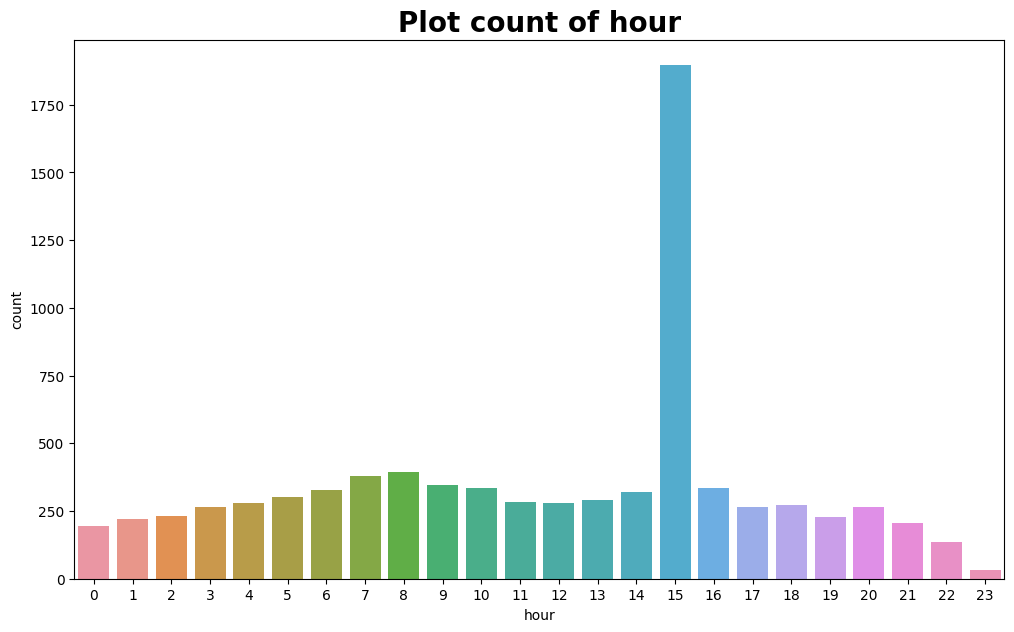

In [21]:

plots.plot_hist(df, 'hour','green')
plots.plot_count(df,'hour')

### plot of the distribution of date

<Figure size 900x700 with 0 Axes>

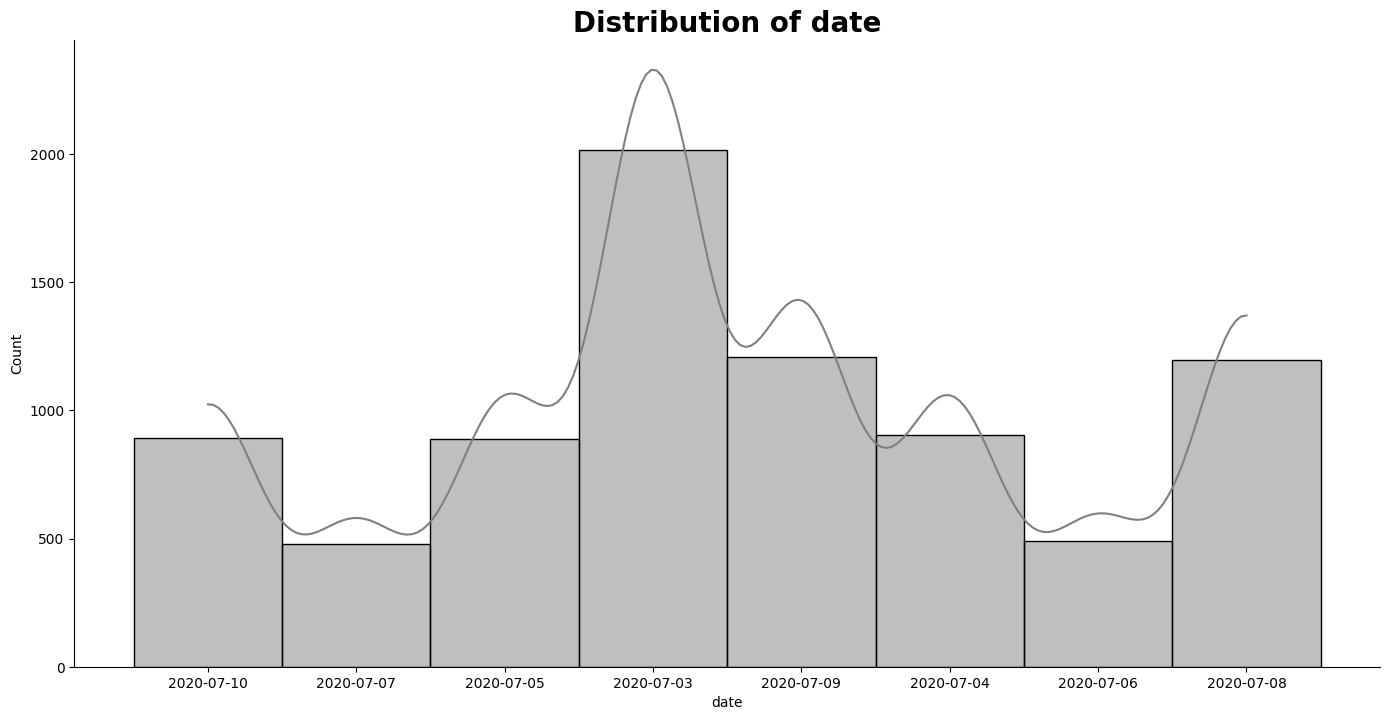

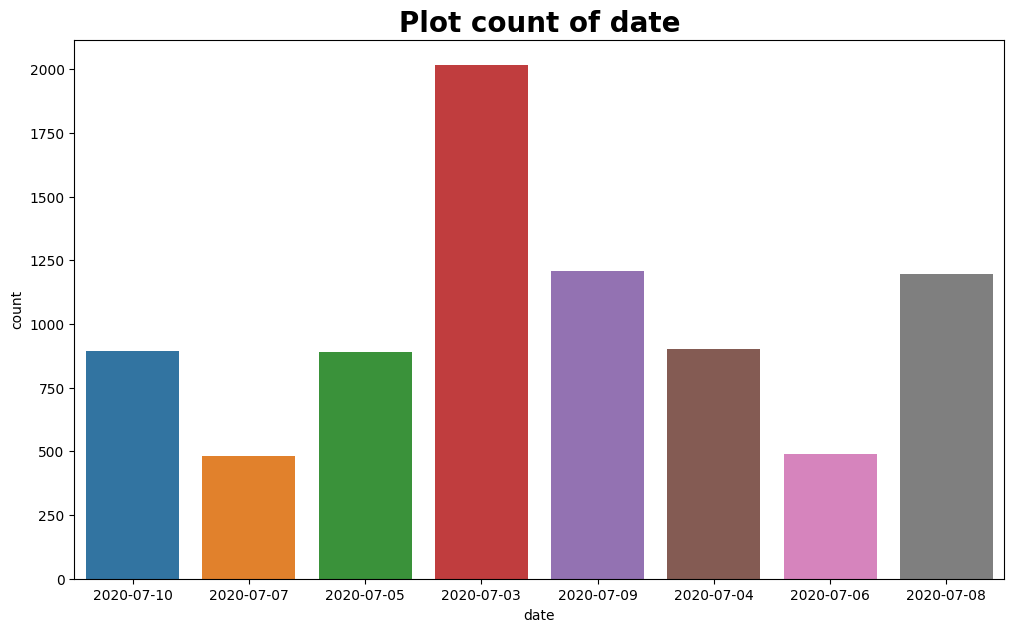

In [23]:
plots.plot_hist(df,'date','grey')
plots.plot_count(df,'date')

### Top 10 browsers

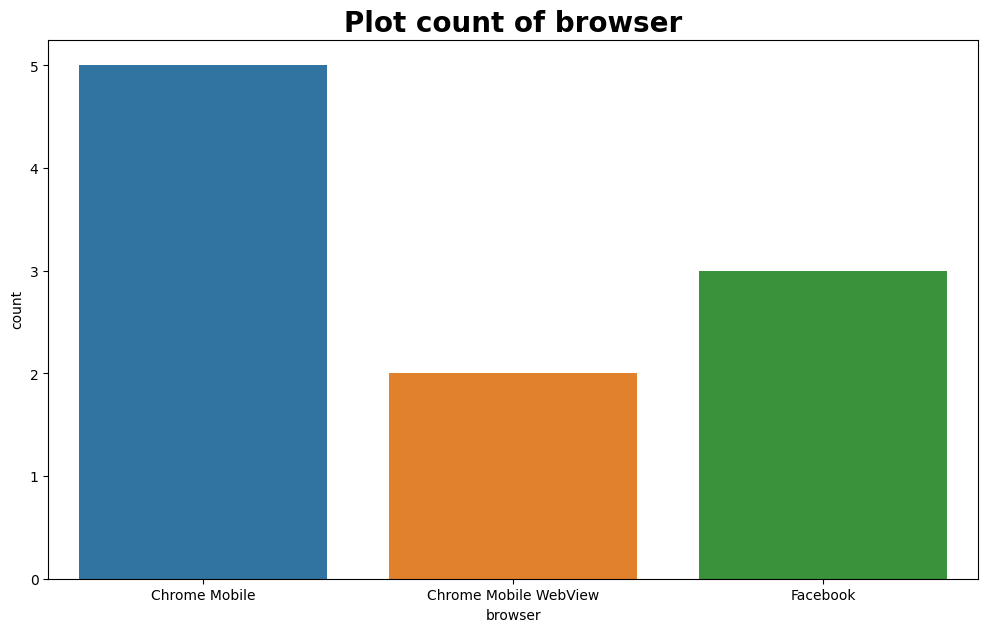

In [24]:
plots.plot_count(df.head(10),'browser')

### experiment count

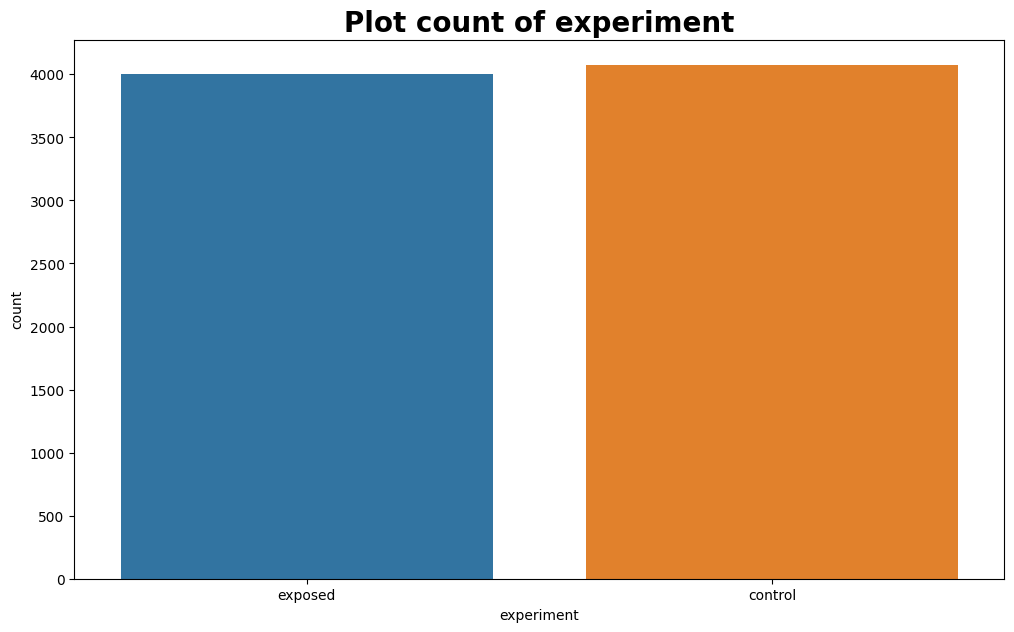

In [25]:
plots.plot_count(df,'experiment')

### experiment distribution

<Figure size 900x700 with 0 Axes>

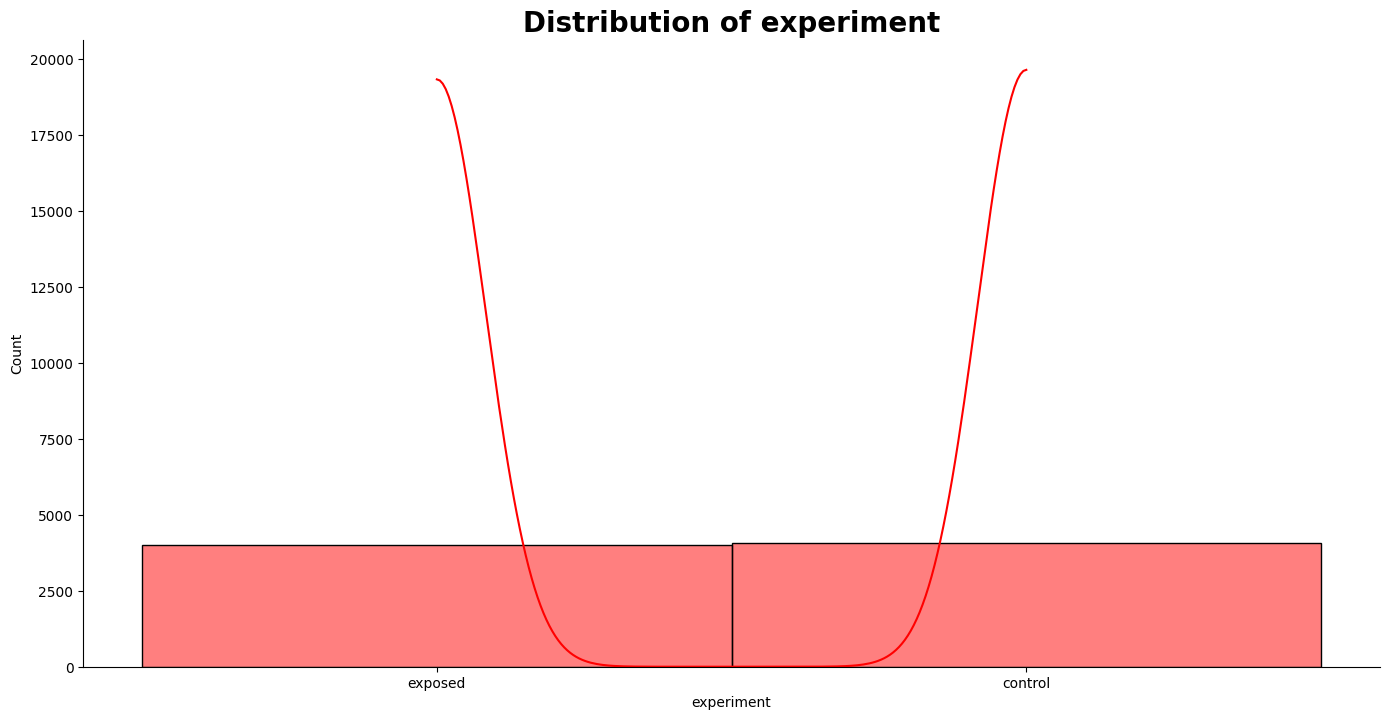

In [31]:
plots.plot_hist(df,'experiment','red')

### count of the platform_os

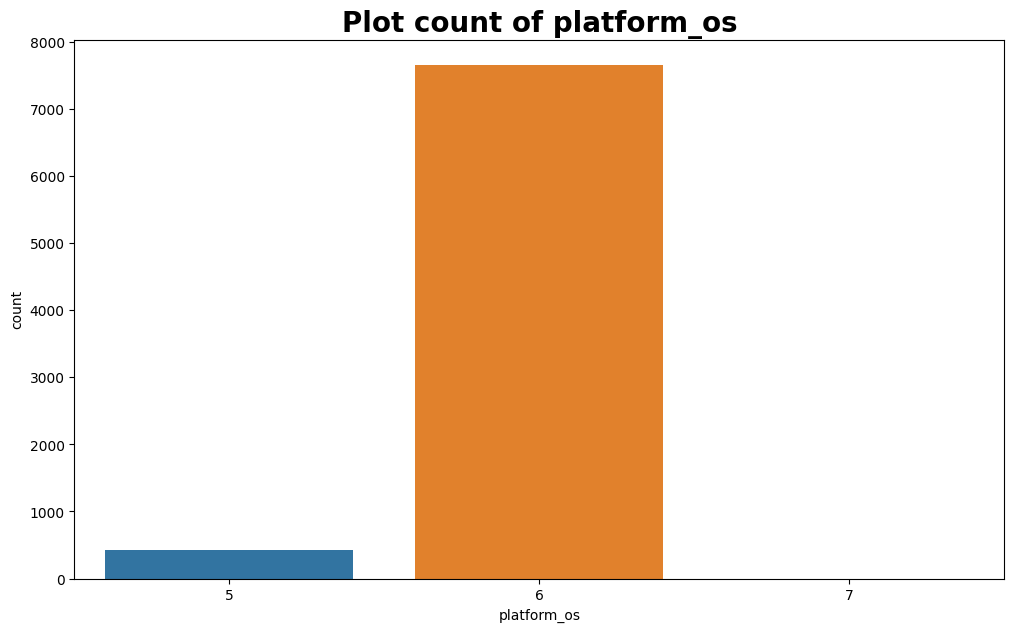

In [26]:
plots.plot_count(df,'platform_os')

### Distribution of device_make

<Figure size 900x700 with 0 Axes>

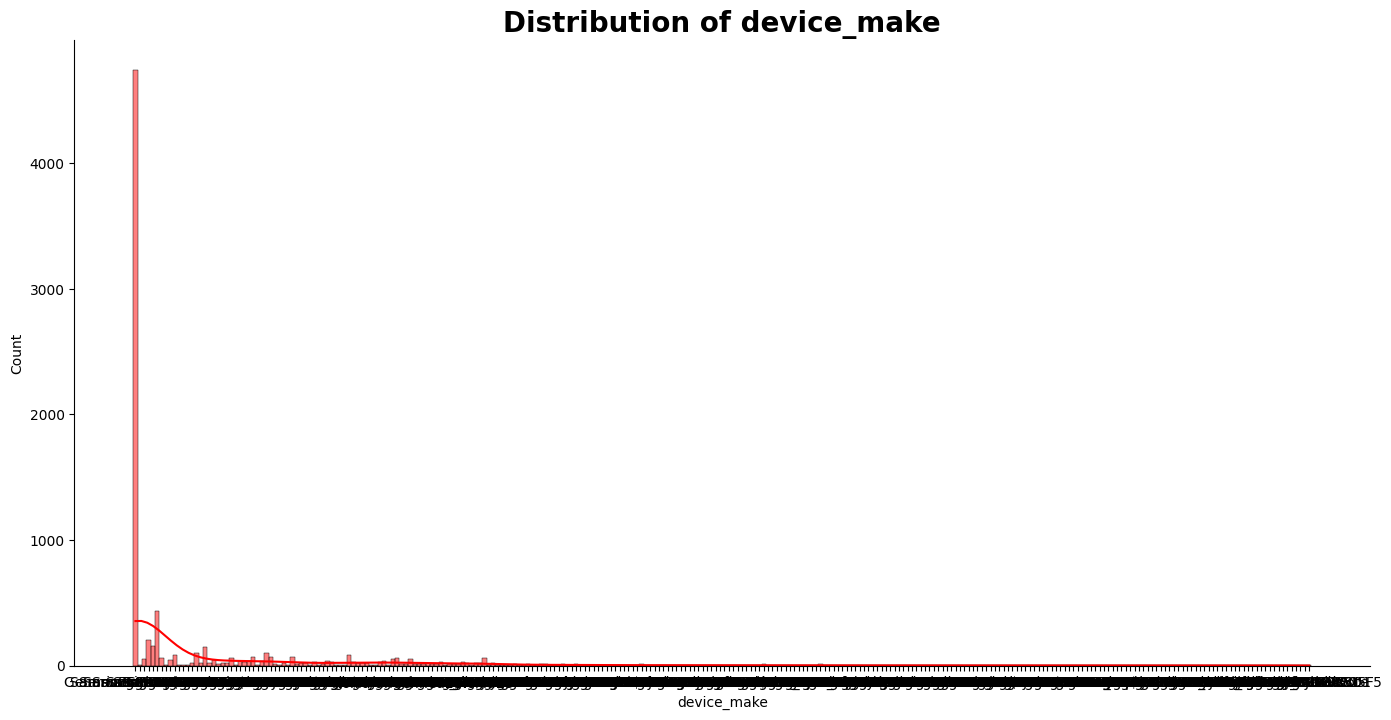

In [49]:
plots.plot_hist(df,'device_make','red')

In [50]:
device_vals = df.groupby('device_make').agg({'yes':'sum','no':'sum'})
device_vals.sort_values(by=['yes','no'], ascending=False)

,yes,no
device_make,,
Generic Smartphone,321,398
Samsung SM-G960F,21,24
Samsung SM-G950F,16,19
Samsung SM-G930F,11,5
Samsung SM-G973F,10,12
...,...,...
XiaoMi Redmi Note 8,0,0
XiaoMi Redmi Note 8 Pro,0,0
XiaoMi Redmi Note 8T,0,0


##### Generic smartphones has many responses from it

### plot of the counts of 'yes' and 'no'

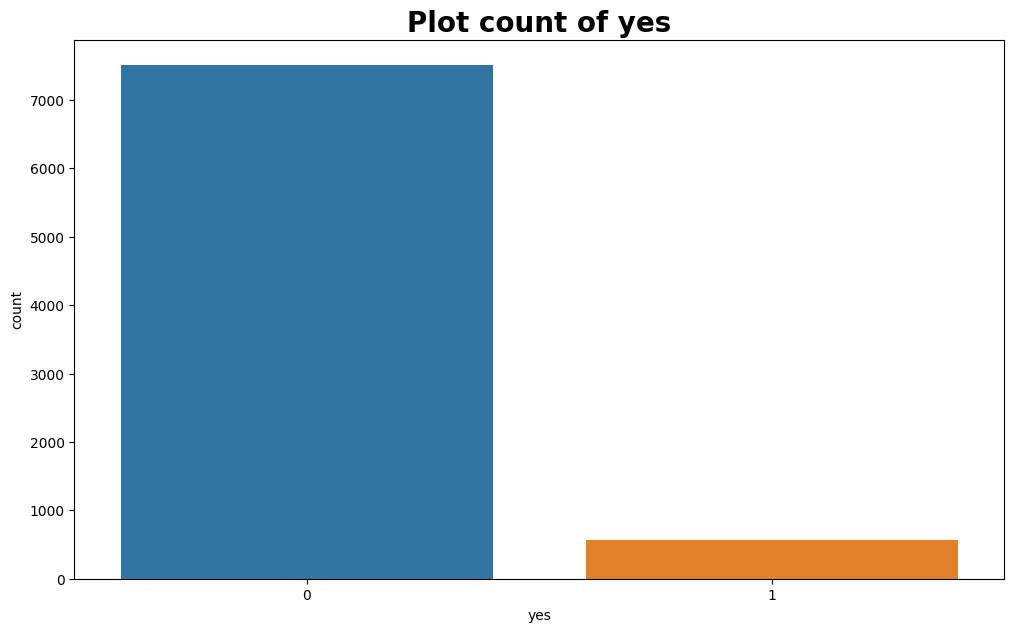

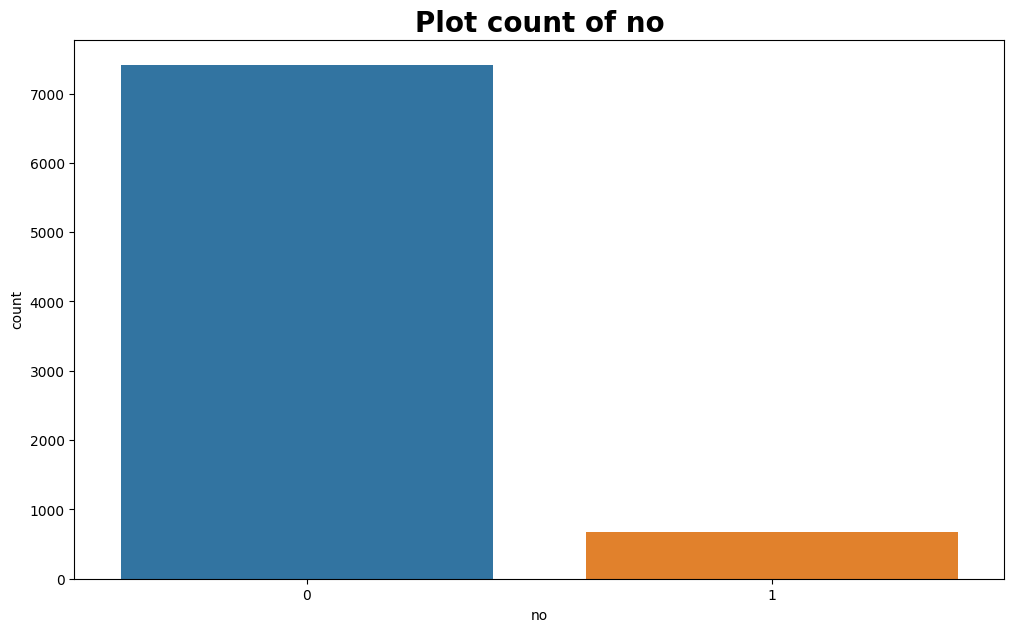

In [27]:
plots.plot_count(df,'yes')
plots.plot_count(df,'no')